# Imports & Setup

In [13]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath("../../src"))

from wordcloud import WordCloud
from preprocessor import TextPreprocessor
from sentiment_analyzer import SentimentAnalyzer
from keyword_extractor import KeywordExtractor
from theme_classifier import ThemeClassifier

In [14]:
class ReviewPipeline:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.preprocessor = TextPreprocessor()
        self.sentiment_model = SentimentAnalyzer()
        self.extractor = KeywordExtractor(max_features=200)
        self.classifier = ThemeClassifier()

    def load_data(self):
        self.df = pd.read_csv(self.data_path)

    def preprocess_text(self):
        self.df["cleaned_review"] = self.df["review"].astype(str).apply(self.preprocessor.preprocess)

    def analyze_sentiments(self):
        self.df[["sentiment_label", "sentiment_score"]] = self.df["review"].apply(
            lambda x: pd.Series(self.sentiment_model.analyze(x))
        )

    def extract_keywords(self):
        return self.extractor.extract_keywords(self.df["cleaned_review"])

    def classify_themes(self):
        self.df["themes"] = self.df["cleaned_review"].apply(self.classifier.classify)

    def get_data(self):
        return self.df


#### handled by the pipeline class:

In [15]:
pipeline = ReviewPipeline("../../data/cbe.csv")
pipeline.load_data()
pipeline.preprocess_text()
pipeline.analyze_sentiments()
pipeline.classify_themes()
keywords = pipeline.extract_keywords()

data = pipeline.get_data()  # get the processed DataFrame

In [16]:
df = data[data['bank'] == 'Commercial Bank of Ethiopia']
df.head()

,review,rating,date,bank,source,cleaned_review,sentiment_label,sentiment_score,themes
0,👌👍,5,6/4/2025,Commercial Bank of Ethiopia,Google Play Store,,neutral,0.0000,[Other]
1,very niec,5,6/4/2025,Commercial Bank of Ethiopia,Google Play Store,niec,neutral,0.0000,[Other]
2,best app of finance,5,6/4/2025,Commercial Bank of Ethiopia,Google Play Store,best app finance,positive,0.6369,[UI/UX]
3,yetemeta,1,6/3/2025,Commercial Bank of Ethiopia,Google Play Store,yetemeta,neutral,0.0000,[Other]
4,Engida Kebede Fetera,5,6/3/2025,Commercial Bank of Ethiopia,Google Play Store,engida kebede fetera,neutral,0.0000,[Other]


# -------------------- Sentiment Analysis --------------------

# Sentiment Counts

In [17]:
sentiment_counts = df["sentiment_label"].value_counts()
print("Sentiment\n", sentiment_counts)

Sentiment
 sentiment_label
positive    214
neutral     112
negative     30
Name: count, dtype: int64


# Count Plot

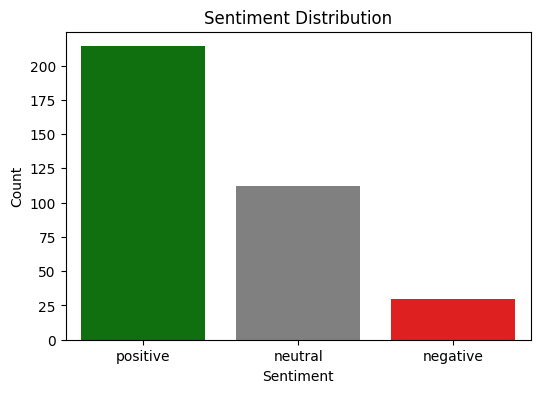

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x="sentiment_label",
    hue="sentiment_label",
    order=["positive", "neutral", "negative"],
    palette={"positive": "green", "neutral": "gray", "negative": "red"},
    legend=False
)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# WordClouds per Sentiment

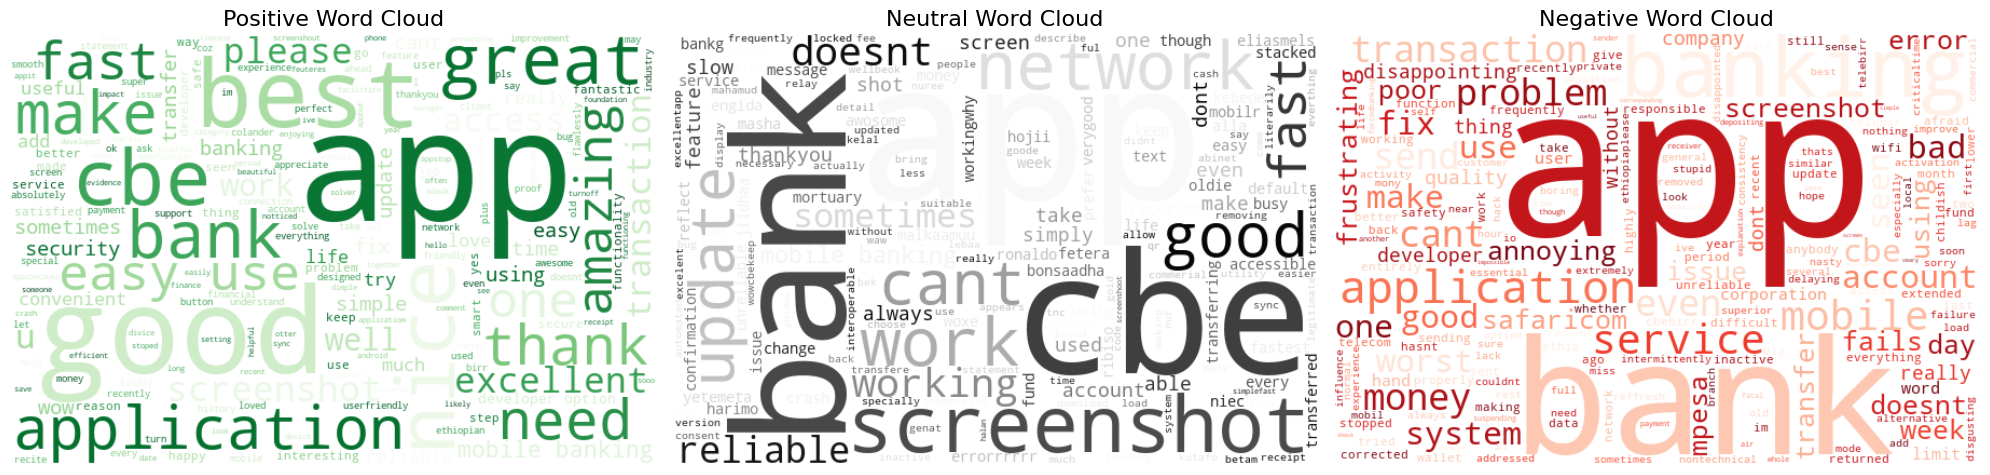

In [19]:
sentiments = ["positive", "neutral", "negative"]
colors = ["Greens", "Greys", "Reds"]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, sentiment in enumerate(sentiments):
    text = " ".join(df[df["sentiment_label"] == sentiment]["cleaned_review"].dropna().astype(str))
    wordcloud = WordCloud(width=600, height=400, background_color="white", colormap=colors[idx]).generate(text)
    axes[idx].imshow(wordcloud, interpolation="bilinear")
    axes[idx].axis("off")
    axes[idx].set_title(f"{sentiment.capitalize()} Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()

# Sample Reviews by Sentiment

In [20]:
for sentiment in sentiments:
    print(f"\nSample {sentiment} reviews:")
    sample_reviews = df[df["sentiment_label"] == sentiment]["cleaned_review"].head(5)
    for i, review in enumerate(sample_reviews, start=1):
        print(f"{i}. {review}")


Sample positive reviews:
1. best app finance
2. good
3. nice bank
4. problem solver application go ahead cbe love much
5. good try make facilitate client

Sample neutral reviews:
1. 
2. niec
3. yetemeta
4. engida kebede fetera
5. masha alla

Sample negative reviews:
1. safety
2. like childish app make better worst ever seen
3. recently big problem sending safaricom telebir even cbebirr wallet could anybody responsible fix frustrating day money hasnt returned take account doesnt send mpesa update corrected sent back money still im afraid send
4. lower system everything
5. using app last two year problem stopped working month ago tried transfer fund give error cant transaction inactive account


# -------------- Sentiment score Distribution By User Rating --------------

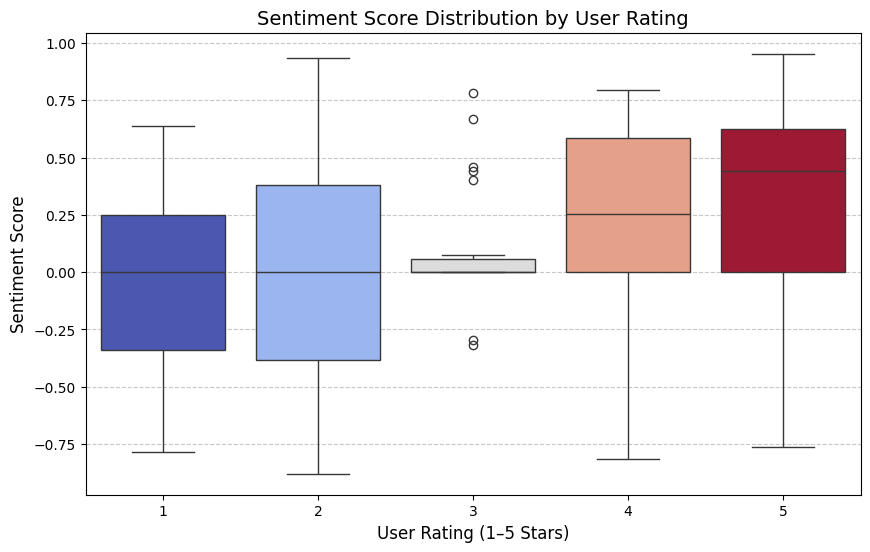

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="rating",
    y="sentiment_score",
    hue="rating",
    palette="coolwarm",
    legend=False
)
plt.title("Sentiment Score Distribution by User Rating", fontsize=14)
plt.xlabel("User Rating (1–5 Stars)", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Keywords from Pipeline

In [22]:
print("Top Keywords:", keywords)

Top Keywords: ['able' 'able screenshot' 'absolutely' 'access' 'account' 'add' 'allow'
 'always' 'amazing' 'amazing app' 'amazing apps' 'annoying' 'app'
 'application' 'application ever' 'application fast' 'application really'
 'appreciate' 'apps' 'ask' 'awesome' 'back' 'bad' 'bank' 'bank apps'
 'bank mobile' 'bank statement' 'banking' 'banking app' 'banking industry'
 'best' 'best app' 'better' 'bug' 'busy' 'button' 'cant' 'cant even'
 'cant take' 'cbe' 'cbe app' 'cbe birr' 'cbe good' 'cbe mobile' 'client'
 'code' 'colander' 'commercial' 'company' 'connection' 'consent'
 'convenient' 'corporation' 'could' 'coz' 'crash' 'customer' 'data' 'day'
 'developer' 'developer option' 'doesnt' 'doesnt work' 'dont' 'easy'
 'easy use' 'even' 'ever' 'ever seen' 'every' 'everything' 'excellent'
 'experience' 'fantastic' 'fast' 'feature' 'fix' 'functionality' 'go'
 'good' 'good app' 'good job' 'great' 'great app' 'hack' 'hand' 'happy'
 'history' 'hope' 'however' 'im' 'impossible' 'improvement' 'inacti

# --------------------- Theme Classification -------------------

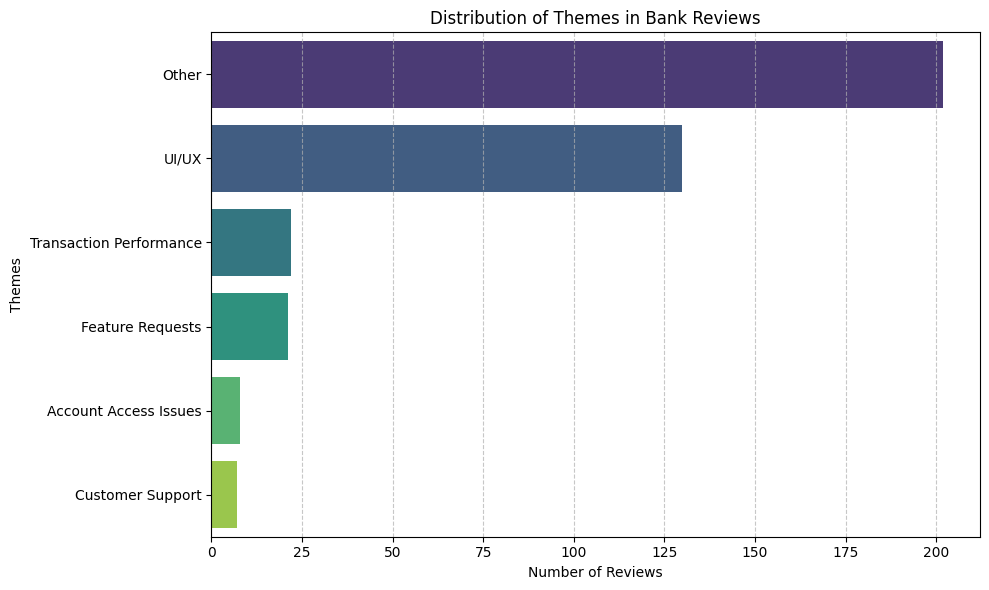

In [23]:
if "themes" in df.columns:
    theme_counts = df["themes"].explode().value_counts().reset_index()
    theme_counts.columns = ["theme", "count"]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=theme_counts,
        x="count",
        y="theme",
        hue="theme",
        palette="viridis",
        dodge=False,
        legend=False
    )
    plt.title("Distribution of Themes in Bank Reviews")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Themes")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'themes' not found in the DataFrame.")